# Prédiction de revenus : cibler de nouveaux clients potentiels 
*Etude data - Projet 7 - Nicolas Pasero (avril 2020)*\
*OpenClassrooms - ENSAE-ENSAI Formation Continue*\
*Traitement des données sur Jupyter Notebook (Distribution Anaconda)*\
*Etude réalisée en langage Python*

*Data source 1:* [Fichier des données de la World Income Distribution, datée de 2008](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/data-projet7.csv)\
*Data source 2:* [Indices de Gini estimés par la Banque mondiale](http://data.worldbank.org/indicator/SI.POV.GINI)

---

## Étude de la diversité des pays
Le but est de montrer la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenu (axe des abscisses) **pour 5 à 10 pays choisis** pour montrer leur diversité.

Il est également nécessaire de représenter la *courbe de Lorenz de chacun des pays choisis*. Pour chacun de ces pays, il sera aussi préciser *l'évolution de l'indice de Gini au fil des ans*. Les pays seront classés par indice de Gini. Puis en conclusion, j'exprimerai *la moyenne des 5 pays ayant l'indice de Gini le plus élevé* et *les 5 pays ayant l'indice de Gini le plus faible*. **En quelle position se trouve la France ?**

In [46]:
#Rappel de l'échantillon "df" traité dans l'analyse
df.head()

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.0,3002678.0,0.3
1,ALB,Albania,2008,2,100,916.66235,7297.0,3002678.0,0.3
2,ALB,Albania,2008,3,100,1010.91600,7297.0,3002678.0,0.3
3,ALB,Albania,2008,4,100,1086.90780,7297.0,3002678.0,0.3
4,ALB,Albania,2008,5,100,1132.69970,7297.0,3002678.0,0.3


In [47]:
#Calcul du revenu moyen du pays dans lequel habite notre prospect
df_income_avg = df[['country_code','income']].groupby('country_code').mean().reset_index()
df_income_avg.rename(columns={'income':'income_avg'}, inplace=True)
df = df.merge(df_income_avg, how='left', on='country_code')
display(df.shape)
display(df.head())   

(11600, 10)

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini,income_avg
0,ALB,Albania,2008,1,100,728.89795,7297.0,3002678.0,0.3,2994.829902
1,ALB,Albania,2008,2,100,916.66235,7297.0,3002678.0,0.3,2994.829902
2,ALB,Albania,2008,3,100,1010.91600,7297.0,3002678.0,0.3,2994.829902
3,ALB,Albania,2008,4,100,1086.90780,7297.0,3002678.0,0.3,2994.829902
4,ALB,Albania,2008,5,100,1132.69970,7297.0,3002678.0,0.3,2994.829902


Le but ici est de *réduire la dimension de nos données* afin de faciliter l'analyse. Le partionnement sera fait à l'aide d'un algorithme non-supervisé, le **k-means.**

In [48]:
#Clustering fait à partir d'une copie de l'échantillon, ici nommée "df_clustering"
df_clustering = df.copy()
df_clustering = df_clustering[df_clustering['country'] != 'Fiji'] 

**La visualisation précédente des distributions de nos variables avait exposée quelques outliers. Le pays Fiji sera exclu du clustering car sa valeur du gdpppp est très influente.**

In [49]:
#Transformation en array Numpy
#Indexation selon les pays par la fonction .set_index()
df_clustering.set_index('country', inplace=True)
df_clustering.head()

,country_code,year,quantile,nb_quantiles,income,gdpppp,population,gini,income_avg
country,,,,,,,,,
Albania,ALB,2008,1,100,728.89795,7297.0,3002678.0,0.3,2994.829902
Albania,ALB,2008,2,100,916.66235,7297.0,3002678.0,0.3,2994.829902
Albania,ALB,2008,3,100,1010.91600,7297.0,3002678.0,0.3,2994.829902
Albania,ALB,2008,4,100,1086.90780,7297.0,3002678.0,0.3,2994.829902
Albania,ALB,2008,5,100,1132.69970,7297.0,3002678.0,0.3,2994.829902


In [50]:
#Par simplification (gain en temps de calcul), le clustering sera fait sur le premier quantile
#Suppression des lignes par méthode .drop_duplicates()
df_clustering.drop_duplicates(subset=['country_code'], inplace=True)
df_clustering

,country_code,year,quantile,nb_quantiles,income,gdpppp,population,gini,income_avg
country,,,,,,,,,
Albania,ALB,2008,1,100,728.897950,7297.00000,3002678.0,0.30,2994.829902
Argentina,ARG,2008,1,100,254.089420,13220.00000,40080160.0,0.45,5847.884654
Armenia,ARM,2008,1,100,366.617800,5611.00000,2907618.0,0.29,1628.382785
Austria,AUT,2008,1,100,2958.076400,36193.00000,8341532.0,0.30,16637.600204
Azerbaijan,AZE,2008,1,100,397.539830,8101.00000,8821873.0,0.31,2357.429023
...,...,...,...,...,...,...,...,...,...
Vietnam,VNM,2006,1,100,234.266950,2578.00000,84617540.0,0.36,1377.773966
Occupied Palestinian Territory,PSE,2009,1,100,195.289900,3695.00000,3957670.0,0.36,1114.098514
Yemen,YEM,2008,1,100,162.951310,2224.00000,21892146.0,0.37,1042.635870


In [51]:
#Préparation des données pour le clustering K-Means
#Ici le clustering sera établi sur les valeurs des variables 'gdpppp' et 'gini'
X = df_clustering.loc[:, ['gdpppp', 'gini']].values
Y = df_clustering.index

display(X.shape)
display(Y.shape)

(115, 2)

(115,)

*Le .shape me permet de vérifier que les 116 pays (moins le pays Fiji) sont toujours dans les données à clusteriser, y compris les deux variables descriptives.*

In [52]:
#Index des données désormais basé sur les noms des 115 pays
df_clustering.index

Index(['Albania', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Belgium',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bosnia and Herzegovina',
       ...
       'Uganda', 'Ukraine', 'Uruguay', 'United States', 'Venezuela', 'Vietnam',
       'Occupied Palestinian Territory', 'Yemen', 'South Africa',
       'The Democratic Republic Of The Congo'],
      dtype='object', name='country', length=115)

In [53]:
#Centrage / réduction des données (nécessaire pour éviter les décalages d'échelle)
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

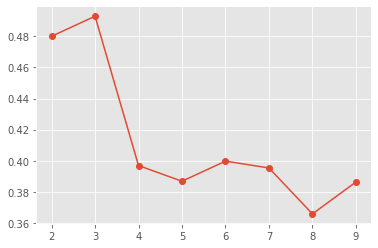

In [54]:
#Calcul  de la métrique "silhouette" pour différents nombres de groupes issus de la méthode des centres mobiles
#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 (clusters) pour tester les possibilités
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.savefig('p7_graphic/country_kmeans.jpg')
plt.show()

**Un k=3 semble pertinent pour la réalisation du clustering**, ce coefficient de silhouette est le plus élevé, le plus représentatif.

In [55]:
#Clustering K-Means en 3 clusters, introduction de notre modèle 'cls'
cls = cluster.KMeans(n_clusters=3)
cls.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
#Tableau des Centroïdes: 3 clusters dans sa version centrée réduite
#Comparaison simplifiée, les dimensions prenant la même importance!
centroids = cls.cluster_centers_
pd.DataFrame(centroids, columns=['gdpppp', 'gini'], index=['cluster0', 'cluster1', 'cluster2'])

,gdpppp,gini
cluster0,1.597383,-0.766041
cluster1,-0.464604,1.222659
cluster2,-0.468108,-0.486949


In [57]:
#Index trié des clusters
idk = np.argsort(cls.labels_)

#Affichage des observations selon leurs clusters
df_cls = pd.DataFrame(df_clustering.index[idk], cls.labels_[idk]).reset_index()
df_cls = df_cls.rename(columns={'index':'cluster'})

In [58]:
#Intégration des clusters dans notre dataframe "df_cls" par la méthode .merge()
#Jointure avec le dataframe initial selon les pays et condition 'inner'
df_cls = pd.merge(df_clustering, df_cls, on='country')
df_cls.head()

,country,country_code,year,quantile,nb_quantiles,income,gdpppp,population,gini,income_avg,cluster
0,Albania,ALB,2008,1,100,728.89795,7297.0,3002678.0,0.30,2994.829902,2
1,Argentina,ARG,2008,1,100,254.08942,13220.0,40080160.0,0.45,5847.884654,1
2,Armenia,ARM,2008,1,100,366.61780,5611.0,2907618.0,0.29,1628.382785,2
3,Austria,AUT,2008,1,100,2958.07640,36193.0,8341532.0,0.30,16637.600204,0
4,Azerbaijan,AZE,2008,1,100,397.53983,8101.0,8821873.0,0.31,2357.429023,2


In [59]:
#Taille des 3 clusters, combien de pays dans chaque?
print(str(len(df_cls[df_cls['cluster'] == 0])) + " clusters dans la première partition")
print(str(len(df_cls[df_cls['cluster'] == 1])) + " clusters dans la seconde partition")
print(str(len(df_cls[df_cls['cluster'] == 2])) + " clusters dans la troisième partition")

26 clusters dans la première partition
37 clusters dans la seconde partition
52 clusters dans la troisième partition


In [60]:
#Pays du cluster 0
print(list(df_cls[df_cls['cluster'] == 0]['country']))

['Austria', 'Belgium', 'Canada', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Finland', 'France', 'United Kingdom', 'Greece', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Netherlands', 'Norway', 'Portugal', 'Slovakia', 'Slovenia', 'Sweden', 'Taiwan', 'United States']


In [61]:
#Pays du cluster 1
print(list(df_cls[df_cls['cluster'] == 1]['country']))

['Argentina', 'Bolivia', 'Brazil', 'Central African', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'Ghana', 'Guatemala', 'Honduras', 'Islamic Republic of Iran', 'Morocco', 'Madagascar', 'Mexico', 'Mozambique', 'Malawi', 'Malaysia', 'Nigeria', 'Nicaragua', 'Panama', 'Peru', 'Philippines', 'Paraguay', 'Russian Federation', 'El Salvador', 'Swaziland', 'Thailand', 'Uganda', 'Uruguay', 'Venezuela', 'South Africa', 'The Democratic Republic Of The Congo']


In [62]:
#Pays du cluster 2
print(list(df_cls[df_cls['cluster'] == 2]['country']))

['Albania', 'Armenia', 'Azerbaijan', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bosnia and Herzegovina', 'Belarus', 'Bhutan', 'Egypt', 'Estonia', 'Georgia', 'Guinea', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Iraq', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Cambodia', 'Republic of Korea', 'Kosovo', "Lao People's Democratic Republic", 'Liberia', 'Sri Lanka', 'Lithuania', 'Latvia', 'Republic of Moldova', 'The Former Yugoslav Republic of Macedonia', 'Mali', 'Montenegro', 'Mongolia', 'Mauritania', 'Niger', 'Nepal', 'Pakistan', 'Poland', 'Romania', 'Sudan', 'Serbia', 'Syrian Arab Republic', 'Tajikistan', 'Timor-Leste', 'Turkey', 'United Republic Of Tanzania', 'Ukraine', 'Vietnam', 'Occupied Palestinian Territory', 'Yemen']


**Choix des pays du cluster 0, car le gdpppp est plus important que pour les autres partitions, mais également un indice de gini très éloigné de 1 indiquant une meilleure répartition des revenus.**

In [63]:
#Affichage des pays les plus contributeurs avec restriction selon le cluster 0
di = np.sum(X_scaled**2,axis=1)
ctr_indiv_inertie = pd.DataFrame({'c_inertie':di, 'country':df_clustering.index, 
                                  'country_code': df_cls['country_code'], 'cluster': df_cls['cluster'], 
                                  'gdpppp': df_cls['gdpppp'], 'gini': df_cls['gini']}).sort_values(by='c_inertie',
                                                                                                   ascending=False)
ctr_indiv_inertie[ctr_indiv_inertie['cluster'] == 0]

,c_inertie,country,country_code,cluster,gdpppp,gini
62,21.617245,Luxembourg,LUX,0,73127.0,0.33
80,9.452728,Norway,NOR,0,49070.0,0.27
108,5.900455,United States,USA,0,43261.0,0.43
25,5.113030,Denmark,DNK,0,34130.0,0.25
79,4.915114,Netherlands,NLD,0,38065.0,0.29
44,4.821413,Ireland,IRL,0,39268.0,0.31
96,4.173884,Sweden,SWE,0,34371.0,0.28
3,4.136935,Austria,AUT,0,36193.0,0.30
95,4.046596,Slovenia,SVN,0,27197.0,0.24
31,3.988318,Finland,FIN,0,33626.0,0.28


In [64]:
nb_cluster =10

#Normalisation des données
pays_info_norm = preprocessing.scale(X)
km = cluster.KMeans(n_clusters = nb_cluster).fit(pays_info_norm)

#On determine les pays qui sont les plus proches des centroides des clusters
i_pays_plus_proches, _ = pairwise_distances_argmin_min(km.cluster_centers_, pays_info_norm)
i_pays_plus_proches

array([ 78,  41,  32, 110,  38,  21,  96,  65,  62,  63])

In [65]:
pays_representatifs_cluster = df_clustering.iloc[i_pays_plus_proches].sort_values('gdpppp', ascending=False)
pays_representatifs_cluster

,country_code,year,quantile,nb_quantiles,income,gdpppp,population,gini,income_avg
country,,,,,,,,,
Luxembourg,LUX,2008,1,100,5780.837400,73127.0,485405.0,0.33,25217.562681
Sweden,SWE,2008,1,100,2284.432900,34371.0,9236428.0,0.28,16184.222707
France,FRA,2008,1,100,2958.304000,30357.0,62209207.0,0.33,18309.407545
Hungary,HUN,2008,1,100,1211.345500,18004.0,9991867.0,0.28,6101.341229
Latvia,LVA,2008,1,100,609.161250,15596.0,2171259.0,0.37,6764.474571
Costa Rica,CRI,2008,1,100,275.653900,10374.0,4463125.0,0.49,5580.386556
Guatemala,GTM,2011,1,100,38.463615,4367.0,14948801.0,0.57,2142.474753
Republic of Moldova,MDA,2008,1,100,402.171000,2768.0,4112891.0,0.31,2149.171399
Vietnam,VNM,2006,1,100,234.266950,2578.0,84617540.0,0.36,1377.773966


**Les 9 pays ci-dessous ont été sélectionnés** selon leur représentation et contribution au sein du cluster.

In [66]:
#Liste des pays retenus 
country_list = ['Luxembourg', 'Sweden', 'Spain', 'France', 'Crotia', 'Norway', 'United States', 'Denmark', 'Austria']
country_code = ['LUX', 'SWE', 'ESP', 'FRA', 'HRV', 'NOR', 'USA', 'DNK', 'AUT']


### Visualisation des pays en 3 graphiques :

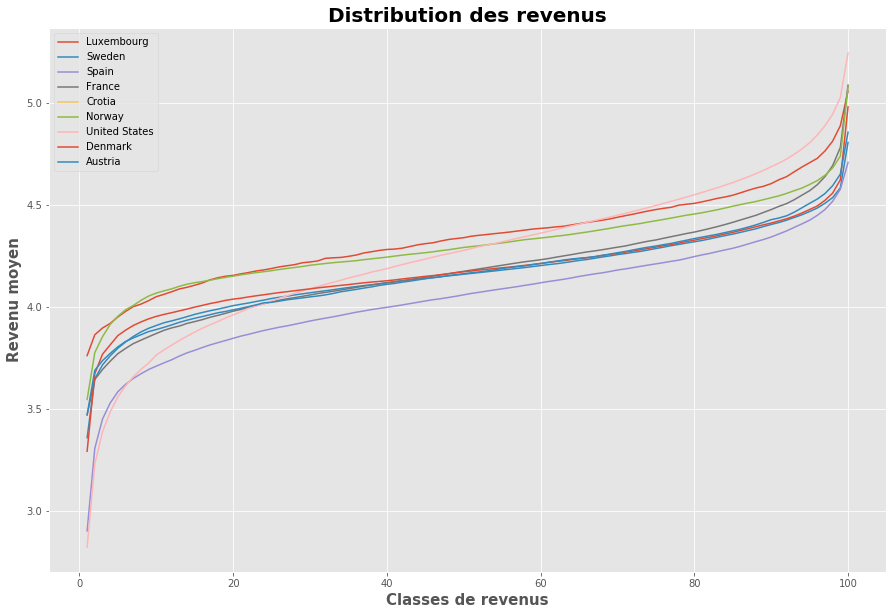

In [67]:
#Distribution des revenus 
plt.figure(figsize=(15,10))

for x in country_list: 
    data = df[df.country == x]
    plt.plot(data['quantile'], np.log10(data['income']), label=x)

plt.title("Distribution des revenus", fontsize=20, fontweight='bold')
plt.xlabel("Classes de revenus", fontsize=15, fontweight='bold')
plt.ylabel("Revenu moyen", fontsize=15, fontweight='bold')
plt.legend()

plt.savefig('p7_graphic/distribution_revenu_country_plot.jpg')
plt.show()

Prenons le cas des extrêmes, **l'Espagne reste toujours le pays le plus pauvre, le Luxembourg le pays le plus riche**, quelque soit la classe de revenu. La courbe des États-Unis montre les disparités entre la population moins aisée et celle plus élitiste. Quant à la France il est intéressant de constater qu'un écart se creuse entre les classes de revenu assez faible et celles plus hautes (après le centile 50) qui positionne la population juste après les classes plus riches des pays leaders États-Unis, luxembourg et Norvège. *Ces tendances seront à vérifier plus bas avec l'évolution des indices de Gini…*

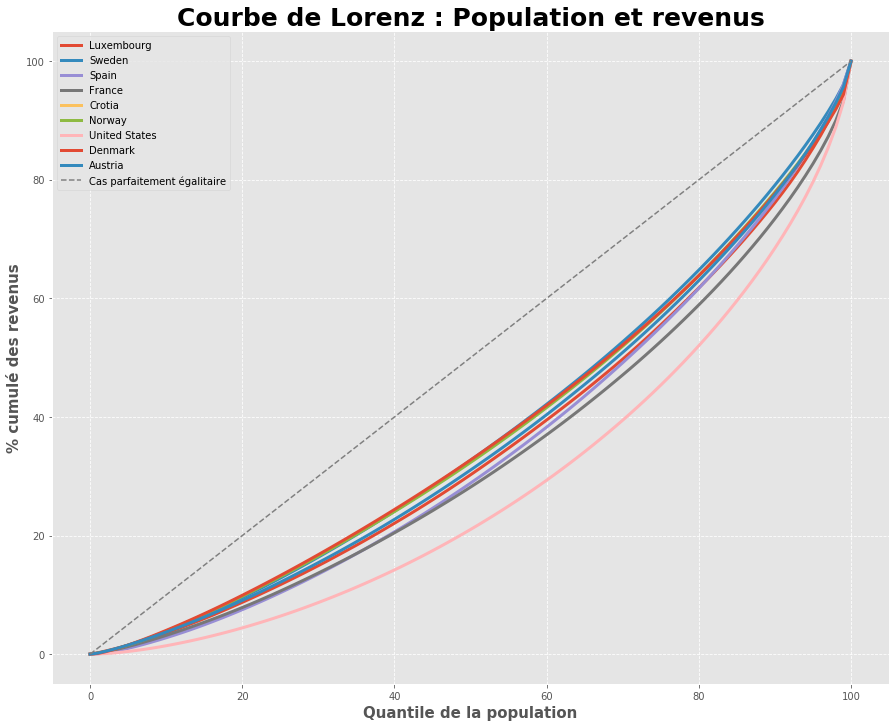

In [68]:
#Courbe de Lorenz
plt.figure(figsize = (15, 12))
list_gini = []

for count in country_list:
    # revenus_total_pays : Revenus total sur les 100 centiles
    revenus_total_pays = df[df.country==count]['income'].sum()
    
    dep = df[df.country==count]['income'].values
    n = len(dep)
    
    # lorenz : Courbe de lorenz
    lorenz = (np.cumsum(np.sort(df[df.country==count]['income']))/revenus_total_pays)*100
    lorenz = np.append([0],lorenz) 
    x = np.append([0],df[df.country==count]['quantile'])    
    plt.plot(x,lorenz,linewidth=3, label=count)

    
plt.plot([0,100],[0,100],'grey',linestyle='--',linewidth=1.5, label='Cas parfaitement égalitaire')
plt.xlabel('Quantile de la population',fontsize=15,fontweight = 'bold')
plt.ylabel('% cumulé des revenus',fontsize=15,fontweight = 'bold')
plt.legend(loc='upper left',fontsize=10)
plt.grid(True,linestyle='--')
plt.title('Courbe de Lorenz : Population et revenus',fontsize=25,fontweight = 'bold')

plt.savefig('p7_graphic/country_lorenz.jpg')
plt.show()

La Suède et le Danemark présentent une distribution des revenus au sein de la population beaucoup plus égalitaire que les autres pays. A l'opposé, on peut distinguer une distribution de revenus plus inégalitaire pour les Etats-Unis et la France.

In [69]:
#Chargement des indices de Gini pour nos pays
#Source https://data.worldbank.org/indicator/SI.POV.GINI
gini_country = pd.read_csv('p7_data/gini_worldbank.csv', skiprows=4)
gini_country.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


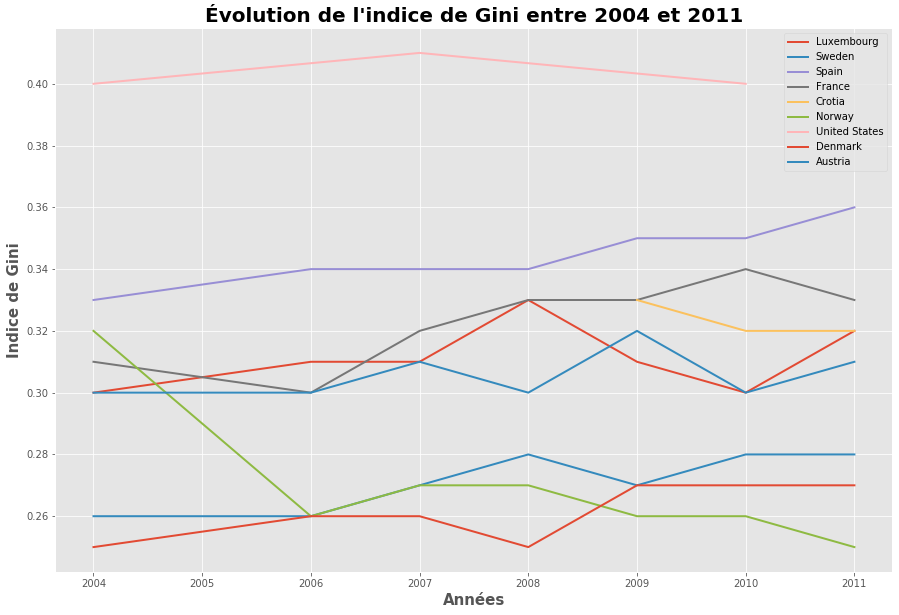

In [70]:
#Évolution de l'indice de Gini
plt.figure(figsize=(15,10))

for c_code, c_name in zip(country_code, country_list):   
    plt.plot(gini_melt[gini_melt['country_code']==c_code]['year'],
             gini_melt[gini_melt.country_code==c_code]['gini'],linewidth=2, label=c_name)

plt.title("Évolution de l'indice de Gini entre 2004 et 2011", fontsize=20, fontweight='bold')
plt.xlabel("Années", fontsize=15, fontweight='bold')
plt.ylabel("Indice de Gini", fontsize=15, fontweight='bold')
plt.legend()

plt.savefig('p7_graphic/gini_evolution.jpg')
plt.show()

Dans la plupart des pays on constate un indice de Gini plus ou moins stable, il n'y a pas de "réels changements" sur cette période. Mais en prenant l'interprétation au cas par cas, pays par pays, on peut relever **quelques points de dégradation pour la France, l'Espagne et pour la Suède**. Une hausse de l'indice expliquant plus d'inégalité de revenu et de patrimoine sur cette courte période de 2004 à 2011, avec 2005 non représentée ici.

In [71]:
#Utilisation de la fonction .rank() pour déterminer la position de chaque pays, dont la France
gini_group = pd.DataFrame(gini_melt.groupby(['country_code', 'country']).gini.mean()).reset_index()
gini_group['rang'] = gini_group['gini'].rank(ascending=True)
gini_group.head()

,country_code,country,gini,rang
0,AGO,Angola,0.430000,102.5
1,ALB,Albania,0.300000,20.0
2,ARG,Argentina,0.455714,116.0
3,ARM,Armenia,0.307143,24.0
4,AUS,Australia,0.343333,53.0


In [72]:
#5 pays ayant l'indice de Gini le plus élevé
gini_group.sort_values(by='gini', ascending=False).head()

,country_code,country,gini,rang
143,ZAF,South Africa,0.63,146.0
94,NAM,Namibia,0.61,145.0
18,BWA,Botswana,0.60,144.0
29,COM,Comoros,0.56,142.5
19,CAF,Central African Republic,0.56,142.5


In [73]:
#5 pays ayant l'indice de Gini le plus faible
gini_group.sort_values(by='gini', ascending=True).head()

,country_code,country,gini,rang
120,SVN,Slovenia,0.245714,1.0
35,DNK,Denmark,0.261429,2.0
119,SVK,Slovak Republic,0.262857,3.0
33,CZE,Czech Republic,0.265714,4.0
135,UKR,Ukraine,0.268571,5.0


In [74]:
#Position de la France 
gini_group[gini_group.country == 'France']

,country_code,country,gini,rang
45,FRA,France,0.322857,37.0


A ce stade, nous avons une idée plus précise du revenu moyen des pays, et de la répartition des richesses. D'un côté des pays riches avec de fortes inégalités ou pas, et des pays comme le notre pour qui les inégalités entre les classes ont eu tendances à se creuser en quelques années. *Voyons comment les classes de revenu des parents peuvent interagir au sein d'un pays, et auprès de leurs enfants*.

[Retour vers la page notebook précédente (Traitement des données, manipulation des quantiles, populations…)](https://github.com/nalron/project_income_analysis/blob/french_version/p7_notebook01.ipynb)

[Voir la suite du projet : Étude des classes de revenu des parents](https://github.com/nalron/project_income_analysis/blob/french_version/p7_notebook03.ipynb)